In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis import *

In [18]:
tems, pres, df_fit = import_data('Time_series_Abril_R.csv')

35.03199922437462 0.0404947315523962 0.0016002513179144 -0.0030497296373689 3.373955752884619 15.56910003139006


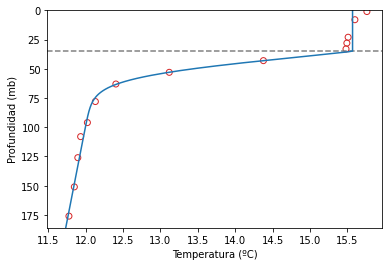

In [36]:
plot_profile_fit(df_fit, tems, pres, 2000)

## Parámetros del ajuste para toda la serie temporal
Ajuste a función:
$$f(z) = a_3 + b_3(z − D) + a_2 e^{(− b_2(z − D) − c_2(z − D)^2)}$$

si $z > D$. En caso contrario: $f(z) = D$

Parámetros:
- `D1`: Profundidad de la capa de mezcla (m)
- `a1`: SST (ºC)
- `a2`: Salto entre termoclina estacional y permanente (ºC)
- `b3`: Pendiente de la termoclina permanente (ºC/m)
- `a3`: Temperatura base de la termoclina permanente (ºC)$

Se representan la evolución de los parámetros de ajuste para toda la serie temporal en intervalos de 800 medidas (? minutos):

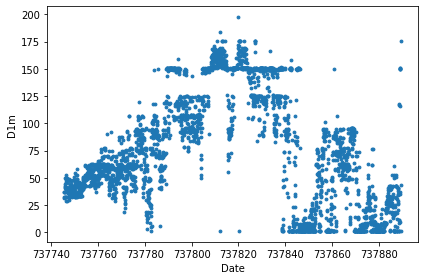

In [39]:
plot_fit_variable(df_fit, 'D1m', 800)

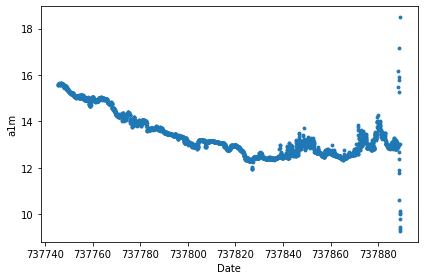

In [40]:
plot_fit_variable(df_fit, 'a1m', 800)

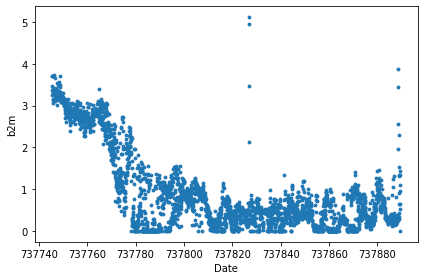

In [41]:
plot_fit_variable(df_fit, 'b2m', 800)

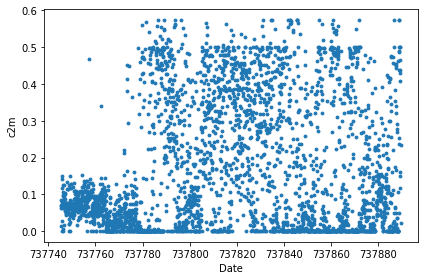

In [42]:
plot_fit_variable(df_fit, 'c2m', 800)

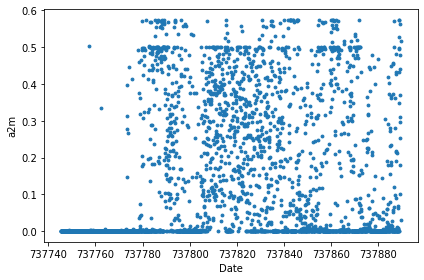

In [43]:
plot_fit_variable(df_fit, 'a2m', 800)

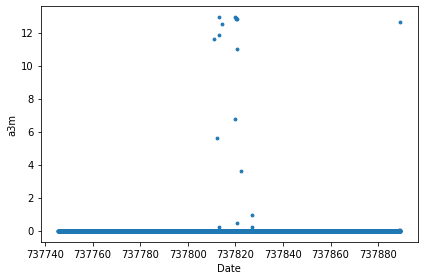

In [45]:
plot_fit_variable(df_fit, 'a3m', 800)

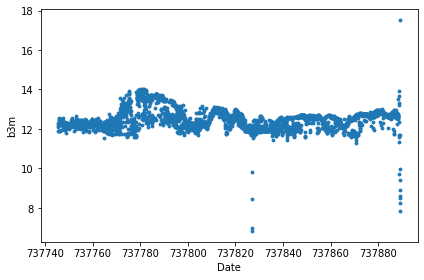

In [44]:
plot_fit_variable(df_fit, 'b3m', 800)

## Estratificación y forma de los ajustes
Se computan los valores $G_\alpha$ y $R_{\alpha:\beta}$ para toda la serie temporal:

$$\Delta_\alpha = \frac{-b_2}{2c_2}\left(1-\sqrt{1-2\lambda log(\alpha)}\right)$$


$$G_\alpha = \frac{f(D) - f(D_\alpha)}{\Delta_\alpha}$$

## Problemas encontrados
1. No todos los ficheros de datos tienen el mismo número de datos -> Serie temporal capada hasta tiempo en que todos los transisitores han realizado medidas
2. Últimos datos de la serie inconsistentes? No se observa un perfil definido, ajuste físico imposible. Relacionado con 1?
3. Fechas: como pasar valores numéricos a seg/min/h/día/mes/año?

## Ideas y futuros pasos
- Aplicar FFT a los parámetros relevantes e indices de estratificación y forma para estudiar periodicidad
- Modificar evolución diferencial para tener en cuenta variaciones en la presión utilizando termistores SBE37